In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy import integrate
from scipy import interpolate

In [2]:
def fcs_cond_probfct(I,I0,delta_t,w,D):
    a = w**2/2/D/delta_t
    return np.sqrt(a/np.pi)*I0**a*I**(a-1)*np.cosh(2*a*np.sqrt(np.log(I)*np.log(I0)))/np.sqrt(-np.log(I))

In [16]:
I = np.linspace(0,1,101)[1:]

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


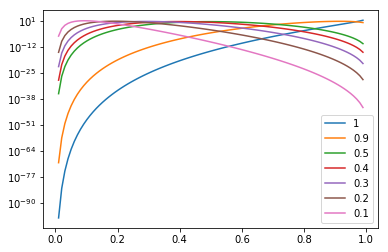

In [4]:
# these probability functions look very nice
delta_t = 0.01
w = 1.0
D = 1.0
sample_list=[1,0.9,0.5,0.4,0.3,0.2,0.1]
for sample in sample_list:
    plt.semilogy(I,fcs_cond_probfct(I,sample,delta_t,w,D),label=str(sample))
plt.legend()

In [5]:
# calculate inverse cummulative distribution function for sampling
def inv_cdf(pdf,x):
    cdf_pdf=[integrate.simps(pdf[:i+1],x[:i+1]) for i in range(len(x)-1)]
    cdf_pdf=np.array([0.0]+cdf_pdf)
    cdf_pdf=cdf_pdf/cdf_pdf[-1]
    return interpolate.interp1d(cdf_pdf,x)

In [40]:
# lets sample
Intensity=[0.7]

N = 10000
sample_array=np.random.random_sample(N)


delta_t = 0.01
D = 1.0
w = 1.0
for sample in sample_array:
    dist = fcs_cond_probfct(D=D,delta_t=delta_t,w=w,I=I,I0=Intensity[-1])
#    print(dist)
    Intensity.append(inv_cdf(dist,I)(sample))
    

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


0.788679953665


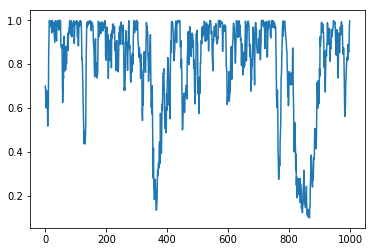

In [41]:
Intensity = np.array(Intensity)
plt.plot(Intensity[:1000])
print(Intensity.mean())

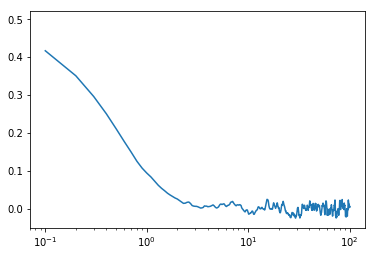

In [38]:
f = np.fft.rfft(Intensity)
acf = np.fft.irfft(f * np.conjugate(f))
acf = np.fft.fftshift(acf) / N
autocorr = acf[int(N/2):]/Intensity.mean()**2

autocorr = autocorr[:1000]-1.0
t = np.arange(0,autocorr.size)*delta_t
plt.semilogx(t,autocorr)